<a href="https://colab.research.google.com/github/Kiron-Ang/DFHL/blob/main/cortisol_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This IPYNB file was created with Google Colab by Kiron Ang
# Print Python version and install/update/import libraries!
!python -V

!pip install -U scikit-learn > output.txt
import sklearn
print("scikit-learn", sklearn.__version__)

!pip install -U polars > output.txt
import polars
print("polars", polars.__version__)

!pip install -U matplotlib > output.txt
import matplotlib
print("matplotlib", matplotlib.__version__)

!pip install -U seaborn > output.txt
import seaborn
print("seaborn", seaborn.__version__)

!pip install -U statsmodels > output.txt
import statsmodels
print("statsmodels", statsmodels.__version__)

Python 3.10.12
scikit-learn 1.5.2
polars 1.9.0
matplotlib 3.7.1
seaborn 0.13.2
statsmodels 0.14.4


In [3]:
# read_csv() to store data in a Polars DataFrame
cortisol = polars.read_csv("cortisol - cleansed.csv")
cortisol = cortisol.drop_nulls()
print("cortisol", cortisol.shape)
print("cortisol contains", cortisol.columns)

cortisol (21587, 14)
cortisol contains ['record_id', 'person_id', 'name', 'cortisol', 'month', 'day', 'year', 'collection', 'awakening', 'collection_minutes', 'awakening_minutes', 'difference_minutes', 'age', 'gender']


In [4]:
# Create two separate Polars DataFrames to hold input X and target y
X = cortisol["month", "collection_minutes", "awakening_minutes", "difference_minutes", "age", "gender"]
print("X", X.shape)
print("X contains", X.columns)
print(X)

y = cortisol["cortisol"]
print("y", y.shape)
print("y contains", y.name)
print(y)

X (21587, 6)
X contains ['month', 'collection_minutes', 'awakening_minutes', 'difference_minutes', 'age', 'gender']
shape: (21_587, 6)
┌───────┬────────────────────┬───────────────────┬────────────────────┬─────┬────────┐
│ month ┆ collection_minutes ┆ awakening_minutes ┆ difference_minutes ┆ age ┆ gender │
│ ---   ┆ ---                ┆ ---               ┆ ---                ┆ --- ┆ ---    │
│ i64   ┆ i64                ┆ i64               ┆ i64                ┆ i64 ┆ i64    │
╞═══════╪════════════════════╪═══════════════════╪════════════════════╪═════╪════════╡
│ 7     ┆ 760                ┆ 420               ┆ 340                ┆ 2   ┆ 0      │
│ 7     ┆ 700                ┆ 360               ┆ 340                ┆ 2   ┆ 0      │
│ 7     ┆ 696                ┆ 360               ┆ 336                ┆ 2   ┆ 0      │
│ 7     ┆ 695                ┆ 420               ┆ 275                ┆ 2   ┆ 0      │
│ 7     ┆ 658                ┆ 380               ┆ 278                ┆ 2   ┆ 0   

In [5]:
# make_pipeline() to organize model steps
import sklearn.pipeline
import sklearn.ensemble

pipeline = sklearn.pipeline.make_pipeline(
    sklearn.ensemble.HistGradientBoostingRegressor(
        random_state = 900, scoring = "r2", validation_fraction = 0.2))

print(pipeline)

Pipeline(steps=[('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=900, scoring='r2',
                                               validation_fraction=0.2))])


In [6]:
"""
THIS IS IN A COMMENT BECAUSE GRIDSEARCH TAKES A LONG TIME TO EXECUTE
# GridSearchCV() to find the best parameters
import sklearn.model_selection

param_grid = {
    'histgradientboostingregressor__learning_rate': [0.001, 0.01, 0.1, 1],
    'histgradientboostingregressor__max_iter': [1, 10, 100, 1000],
    'histgradientboostingregressor__max_leaf_nodes': [10, 100, 1000, 10000],
}

gridsearchcv = sklearn.model_selection.GridSearchCV(pipeline, param_grid)

gridsearchcv.fit(X, y)

best_estimator = gridsearchcv.best_estimator_
print(best_estimator)

OUTPUT:
Pipeline(steps=[('histgradientboostingregressor',
                 HistGradientBoostingRegressor(learning_rate=0.01,
                                               max_iter=1000, max_leaf_nodes=10,
                                               random_state=900, scoring='r2',
                                               validation_fraction=0.2))])
"""

"\nTHIS IS IN A COMMENT BECAUSE GRIDSEARCH TAKES A LONG TIME TO EXECUTE\n# GridSearchCV() to find the best parameters\nimport sklearn.model_selection\n\nparam_grid = {\n    'histgradientboostingregressor__learning_rate': [0.001, 0.01, 0.1, 1],\n    'histgradientboostingregressor__max_iter': [1, 10, 100, 1000],\n    'histgradientboostingregressor__max_leaf_nodes': [10, 100, 1000, 10000],\n}\n\ngridsearchcv = sklearn.model_selection.GridSearchCV(pipeline, param_grid)\n\ngridsearchcv.fit(X, y)\n\nbest_estimator = gridsearchcv.best_estimator_\nprint(best_estimator)\n\nOUTPUT:\nPipeline(steps=[('histgradientboostingregressor',\n                 HistGradientBoostingRegressor(learning_rate=0.01,\n                                               max_iter=1000, max_leaf_nodes=10,\n                                               random_state=900, scoring='r2',\n                                               validation_fraction=0.2))])\n"

In [7]:
# make_pipeline() to incorporate grid search results
import sklearn.pipeline
import sklearn.ensemble

pipeline = sklearn.pipeline.make_pipeline(
    sklearn.ensemble.HistGradientBoostingRegressor(
        random_state = 900, scoring = "r2", validation_fraction = 0.2,
        learning_rate = 0.01, max_iter = 1000, max_leaf_nodes = 10))

print(pipeline)

Pipeline(steps=[('histgradientboostingregressor',
                 HistGradientBoostingRegressor(learning_rate=0.01,
                                               max_iter=1000, max_leaf_nodes=10,
                                               random_state=900, scoring='r2',
                                               validation_fraction=0.2))])


In [8]:
# cross_validate() to determine model performance
cross_validate = sklearn.model_selection.cross_validate(
    pipeline, X, y, cv = 10, verbose = 3)

print("r^2 score:", cross_validate["test_score"].mean())

[CV] END ......................................., score=0.393 total time=   1.4s
[CV] END ......................................., score=0.467 total time=   1.4s
[CV] END ......................................., score=0.464 total time=   1.1s
[CV] END ......................................., score=0.487 total time=   1.1s
[CV] END ......................................., score=0.457 total time=   2.0s
[CV] END ......................................., score=0.190 total time=   1.5s
[CV] END ......................................., score=0.453 total time=   1.2s
[CV] END ......................................., score=0.398 total time=   2.1s
[CV] END ......................................., score=0.505 total time=   1.7s
[CV] END ......................................., score=0.364 total time=   1.8s
r^2 score: 0.41772473449562114


In [9]:
# fit() the model to all the data
pipeline.fit(X, y)

# read_csv() to store data in a Polars DataFrame
bdi = polars.read_csv("cortisol - 402_people.csv")
bdi = bdi.drop_nulls()
print("bdi", bdi.shape)
print("bdi contains", bdi.columns)

bdi (402, 5)
bdi contains ['id', 'name', 'gender', 'birth_year', 'bdi']


In [10]:
# Extrapolate two cortisol measurements with predict():
# 1) 7 AM in July 2003
# 2) 4 PM in July 2003

# Add age column; age = 2003 - birth_year
age = polars.Series("age", 2003 - bdi["birth_year"])
bdi.insert_column(-1, age)

# Add month column; BDI survey scores were collected in July, 2003
month = polars.Series("month", [7] * 402)
bdi.insert_column(-1, month)

# Add awakening_minutes column; assume everyone wakes up at 6 AM
awakening_minutes = polars.Series("awakening_minutes", [360] * 402)
bdi.insert_column(-1, awakening_minutes)

# Add collection_minutes_1; assume 7 AM
collection_minutes_1 = polars.Series("collection_minutes_1", [420] * 402)
bdi.insert_column(-1, collection_minutes_1)

# Add collection_minutes_2; assume 4 PM
collection_minutes_2 = polars.Series("collection_minutes_2", [960] * 402)
bdi.insert_column(-1, collection_minutes_2)

# Add difference_minutes_1
difference_minutes_1 = polars.Series("difference_minutes_1", bdi["collection_minutes_1"] - bdi["awakening_minutes"])
bdi.insert_column(-1, difference_minutes_1)

# Add difference_minutes_2
difference_minutes_2 = polars.Series("difference_minutes_2", bdi["collection_minutes_2"] - bdi["awakening_minutes"])
bdi.insert_column(-1, difference_minutes_2)

print("bdi", bdi.shape)
print("bdi contains", bdi.columns)

bdi (402, 12)
bdi contains ['id', 'name', 'gender', 'birth_year', 'age', 'month', 'awakening_minutes', 'collection_minutes_1', 'collection_minutes_2', 'difference_minutes_1', 'difference_minutes_2', 'bdi']


In [11]:
# Create new two new Polars DataFrames (X_1, X_2) to
# predict cortisol measurements (cortisol_1, cortisol_2)
X_1 = bdi["month", "collection_minutes_1", "awakening_minutes", "difference_minutes_1", "age", "gender"]
print("X_1", X_1.shape)
print("X_1 contains", X_1.columns)
print(X_1)

X_2 = bdi["month", "collection_minutes_2", "awakening_minutes", "difference_minutes_2", "age", "gender"]
print("X_2", X_2.shape)
print("X_2 contains", X_2.columns)
print(X_2)

X_1 (402, 6)
X_1 contains ['month', 'collection_minutes_1', 'awakening_minutes', 'difference_minutes_1', 'age', 'gender']
shape: (402, 6)
┌───────┬──────────────────────┬───────────────────┬──────────────────────┬─────┬────────┐
│ month ┆ collection_minutes_1 ┆ awakening_minutes ┆ difference_minutes_1 ┆ age ┆ gender │
│ ---   ┆ ---                  ┆ ---               ┆ ---                  ┆ --- ┆ ---    │
│ i64   ┆ i64                  ┆ i64               ┆ i64                  ┆ i64 ┆ i64    │
╞═══════╪══════════════════════╪═══════════════════╪══════════════════════╪═════╪════════╡
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 7   ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 14  ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 11  ┆ 0      │
│ 7     ┆ 420                  ┆ 360               ┆ 60                   ┆ 10  ┆ 0      │
│ 7     ┆ 420                  ┆ 360       

In [12]:
# Use predict() twice to get two arrays of numbers that
# represent the two extrapolated cortisol measurements
X_1 = X_1.rename({"collection_minutes_1": "collection_minutes", "difference_minutes_1": "difference_minutes"})
cortisol_1 = pipeline.predict(X_1)
print("cortisol_1", cortisol_1.shape)
print(cortisol_1[0:10])

X_2 = X_2.rename({"collection_minutes_2": "collection_minutes", "difference_minutes_2": "difference_minutes"})
cortisol_2 = pipeline.predict(X_2)
print("cortisol_2", cortisol_2.shape)
print(cortisol_2[0:10])

cortisol_1 (402,)
[0.3081441  0.31627931 0.30753057 0.30753057 0.30725834 0.32075597
 0.2985604  0.31440078 0.33232725 0.36294351]
cortisol_2 (402,)
[0.09271367 0.09613589 0.09271367 0.09271367 0.09271367 0.10938369
 0.10185248 0.09292122 0.10545278 0.10809361]


In [13]:
# Calculate the difference between cortisol_1 and cortisol_2
# This will be plotted against BDI scores
cortisol_differences = polars.Series("cortisol_differences", cortisol_1 - cortisol_2).to_numpy()
print("cortisol_differences", cortisol_differences.shape)
print(cortisol_differences[0:10])

# Extract BDI scores from the DataFrame and convert to numpy array
# to serve as input for statsmodels library
bdi_scores = polars.Series("bdi_scores", bdi["bdi"]).to_numpy()
print("bdi_scores", bdi_scores.shape)
print(bdi_scores[0:10])

cortisol_differences (402,)
[0.21543043 0.22014342 0.2148169  0.2148169  0.21454467 0.21137228
 0.19670792 0.22147957 0.22687446 0.2548499 ]
bdi_scores (402,)
[14 15 14 19 16 16 26 15 19 19]


In [14]:
# Fit robust linear model with statsmodels.api
import statsmodels.api

# Add a constant to determine a y-intercept
rlm_bdi_scores = statsmodels.api.add_constant(bdi_scores)

# Robust linear model with RLM(dependent variable, independent variable)
rlm = statsmodels.api.RLM(cortisol_differences, rlm_bdi_scores).fit()
print("params:", rlm.params)
print("tvalues:", rlm.tvalues)
print("pvalues:", rlm.pvalues)

params: [ 0.22211912 -0.00045704]
tvalues: [56.53159162 -2.39694974]
pvalues: [0.         0.01653219]


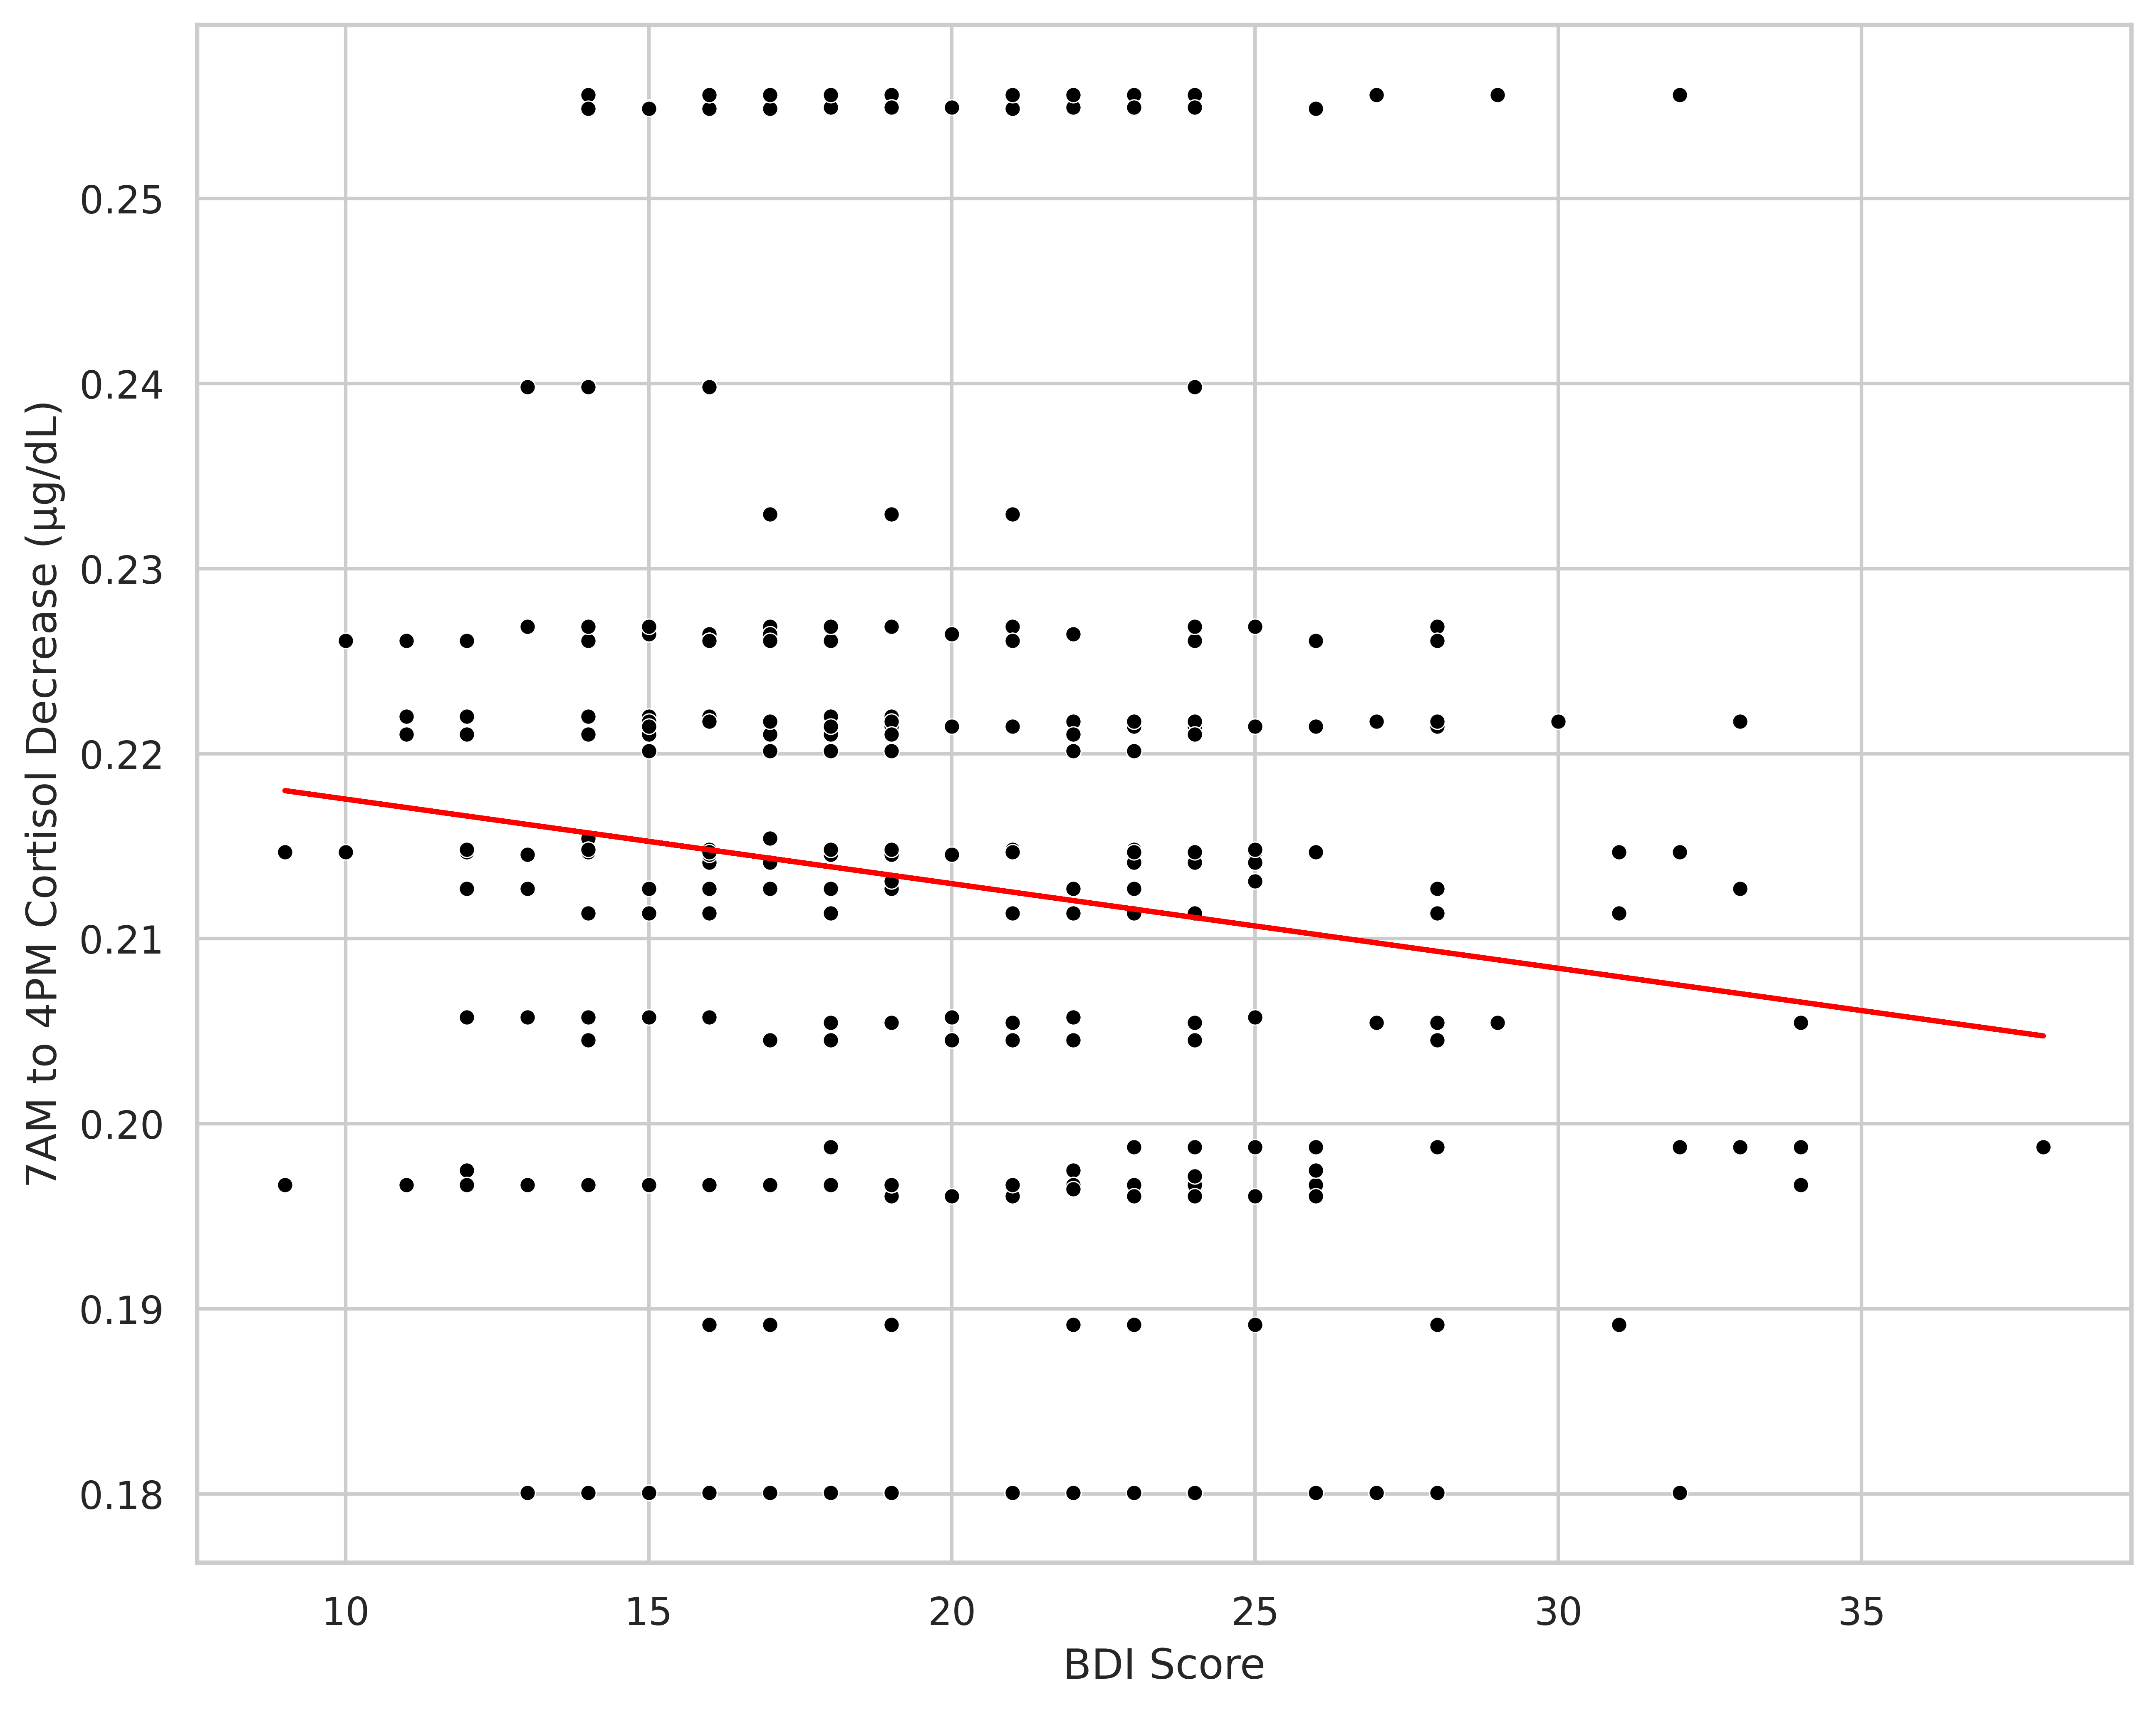

In [15]:
# Create a scatter plot with matplotlib.pyplot and seaborn
import matplotlib.pyplot

seaborn.set_theme(style="whitegrid")

# Control figure size and resolution with matplotlib.pyplot.figure
matplotlib.pyplot.figure(figsize = (10, 8), dpi = 600)

scatterplot = seaborn.scatterplot(
    y = cortisol_differences,
    x = bdi_scores,
    s = 20,
    color = "black"
)

# Plot a red line representing the robust linear model
# with plot(independent variable, dependent variable)
matplotlib.pyplot.plot(bdi_scores, rlm.predict(rlm_bdi_scores), color = 'red')

# Add labels to the plot
matplotlib.pyplot.ylabel("7AM to 4PM Cortisol Decrease (µg/dL)", fontsize = 12)
matplotlib.pyplot.xlabel("BDI Score", fontsize = 12)

# Save the scatter plot!
scatterplot.figure.savefig("cortisol_depression_kiron.png", dpi=600, bbox_inches='tight')